In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [ ]:
# import calibration curves from "acetone_cal.ipynb"
%run acetone_cal.ipynb

In [42]:
# integrated bimolecular rate equation
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

In [43]:
# unimolecular rate equation
def exp(x,b,k):
  return b * np.exp(- k * x)

In [44]:
with open('ac_50_1.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [45]:
xs = np.array(data).astype(float)[:,0]

In [46]:
data = np.array(data).astype(float)[:,1]

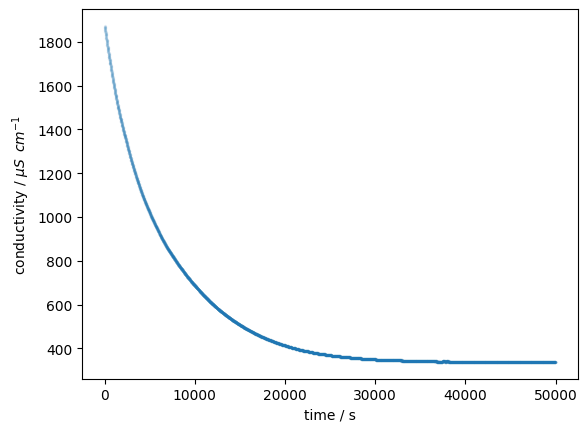

In [47]:
plt.scatter(xs,data,s=2,alpha=0.1,marker='o')
plt.xlabel('time / s')
plt.ylabel('conductivity / $\mu S \hspace{.5} cm^{-1}$')
plt.show()

In [90]:
vol = 30
m_bncl = 0.1033
vol += m_bncl / 1.1 # account for volume of BnCl
n_ki = 0.0758 / 166.0028
n_bncl = m_bncl / 126.58
b = 1000 * n_ki / vol
a = 1000 * n_bncl / vol

In [94]:
a

0.02711793562807492

In [95]:
b

0.01517313030489983

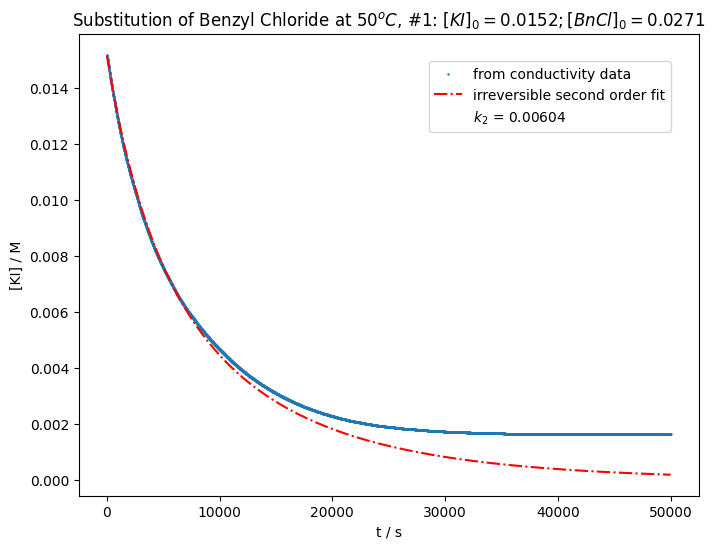

In [130]:
x = xs
y = np.array( inv_quad_p(data,*popt50_i) )

plt.figure(figsize=(8,6))
plt.scatter(x,y,s=.5,alpha=1,marker='o',label='from conductivity data')

# Bimolecular fit on first 10000s of reaction
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:1000] , y[:1000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x,c_second(x,a,b,k2),'r-.',label='irreversible second order fit')


plt.plot([],[],alpha=0,label=f'$k_2$ = {k2:.5f}')

plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.title(f'Substitution of Benzyl Chloride at $50^oC$, #1: $[KI]_0 = {b:.4f}; [BnCl]_0 = {a:.4f}$')
plt.legend(borderaxespad=2)

plt.show()

In [97]:
d_eq = y[0] - y[-1]

In [98]:
a - d_eq

0.013555245466560797

In [99]:
b - d_eq

0.0016104401433857055

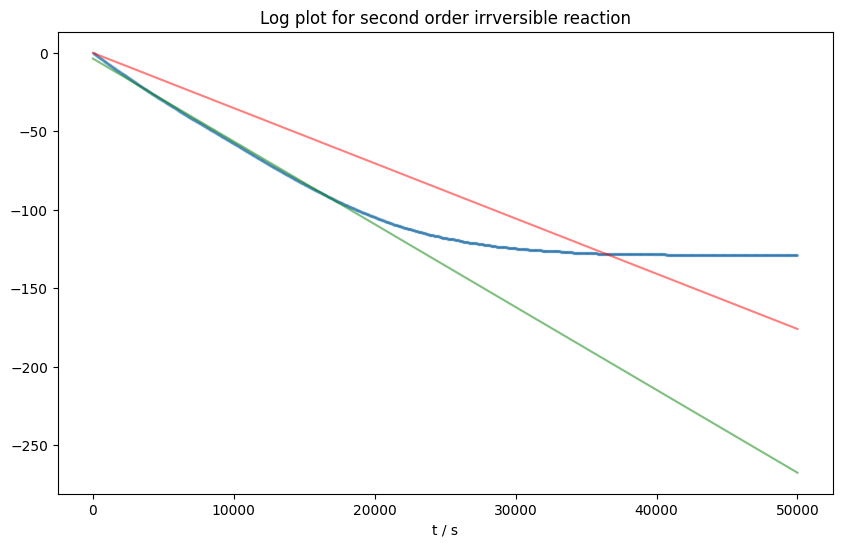

In [100]:
s_y = np.log( a/b * y / ((a - b) + y) ) / (a - b)
plt.figure(figsize=(10,6))
plt.scatter(x,s_y,s=2,alpha=0.05,marker='o')

# straight line fit for whole rxn
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x.reshape(-1,1),s_y.reshape(-1,1))
m = lin_reg.coef_[0][0]
plt.plot(x,(m*x),'r-',alpha=0.5)

# straight line for start of rxn
lin_reg2 = LinearRegression(fit_intercept=True)
lin_reg2.fit(x[:2000].reshape(-1,1),s_y[:2000].reshape(-1,1))
m2 = lin_reg2.coef_[0][0]
int2 = lin_reg2.intercept_[0]
plt.plot(x,(m2*x + int2),'g-',alpha=0.5)

plt.title('Log plot for second order irrversible reaction')
plt.xlabel('t / s')


plt.show()

In [101]:
m

-0.0035188503375510796

In [102]:
m2

-0.005278003267778766

In [103]:
k2

0.006042736533740688

## IR DATA

In [104]:
IR_679 = pd.read_csv('ac_50_1_679_2deriv.txt',sep="\t")

In [105]:
ir_679 = IR_679[IR_679.columns[1]]

In [106]:
ir_679 = np.array(ir_679)

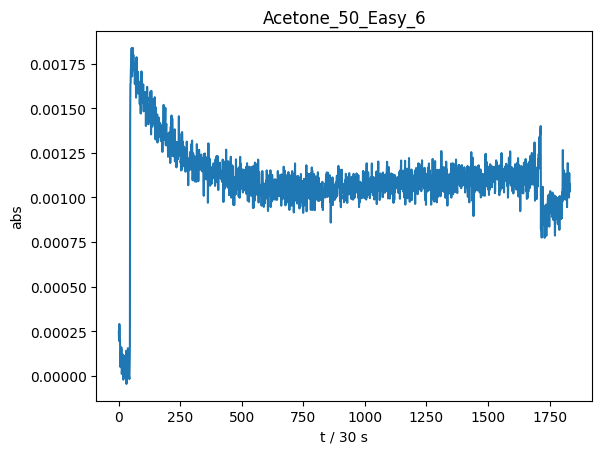

In [107]:
plt.plot(ir_679)
plt.xlabel('t / 30 s')
plt.ylabel('abs')
plt.title('Acetone_50_Easy_6')
plt.show()

In [108]:
ir_clean_679 = ir_679[45:]

In [109]:
ir_xs = np.array(range(0,len(ir_clean_679)*30,30))

In [110]:
bncl_conc_ir_679 = (ir_clean_679 - int_679) / slope_679

In [112]:
ki_conc_ir_679 = b - (a - bncl_conc_ir_679)

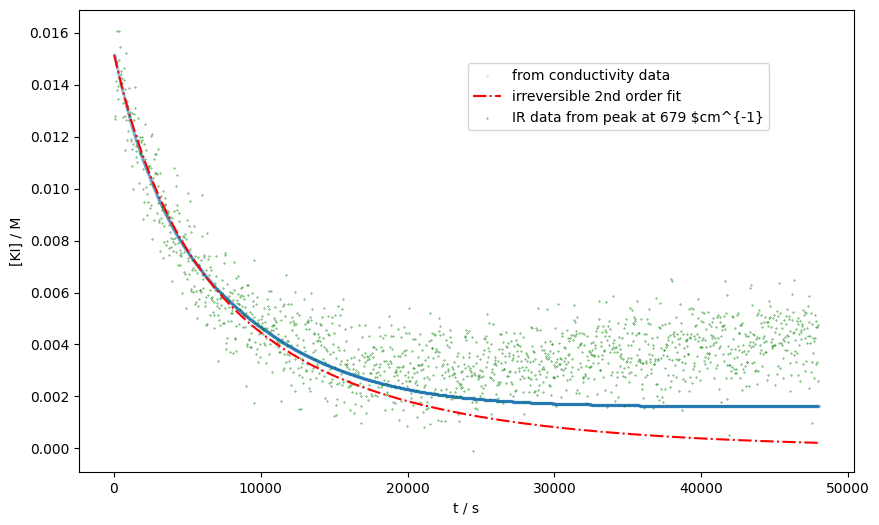

In [113]:
plt.figure(figsize=(10,6))

plt.scatter(x[:4800],y[:4800],s=2,alpha=0.1,marker='o',label='from conductivity data')

plt.plot(x[:4800],c_second(x[:4800],a,b,k2),'r-.',label='irreversible 2nd order fit')

# Uncomment to add IR data
plt.scatter(ir_xs[2:int(48000/30)],ki_conc_ir_679[2:int(48000/30)],s=.1,c='green',label='IR data from peak at 679 $cm^{-1}')


plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.legend(loc=1,bbox_to_anchor=(.9,.9))

plt.show()

In [151]:
IR_new = pd.read_csv('ac_50_1_ir_2.txt',sep="\t")

In [152]:
IR_new

,DateTime,Peak at 704 cm-1,Peak at 762 cm-1,Peak at 1714 cm-1,Peak at 1720 cm-1,Peak at 1354 cm-1,Peak at 1720 cm-1 1,Events
0,00:00:24.929,0.001116,-0.002468,-1.110223e-16,0.011296,1.438174,-0.000487,NaN
1,00:00:54.938,0.001257,-0.002439,-5.551115e-17,0.010079,1.372032,-0.000582,NaN
2,00:01:24.896,0.000954,-0.002188,-1.665335e-16,0.009534,1.247605,-0.000503,NaN
3,00:01:54.847,0.000954,-0.001849,0.000000e+00,0.007757,1.012222,-0.000445,NaN
4,00:02:24.810,0.000582,-0.000898,-5.551115e-17,0.005423,0.742497,-0.000213,NaN
...,...,...,...,...,...,...,...,...
1828,19:09:31.278,0.010568,0.002370,8.054604e-03,0.007454,-0.006088,0.009030,NaN
1829,19:10:01.296,0.010657,0.002395,8.958675e-03,0.008213,0.002892,0.010313,NaN
1830,19:10:31.269,0.010935,0.002420,8.703058e-03,0.007791,-0.007900,0.009848,NaN
1831,19:11:01.192,0.010982,0.002534,7.355342e-03,0.006709,-0.004133,0.008509,NaN


In [153]:
IR_new[IR_new.columns[5]] = IR_new[IR_new.columns[5]] * -1

Text(0.5, 1.0, 'Auto Trend Picking')

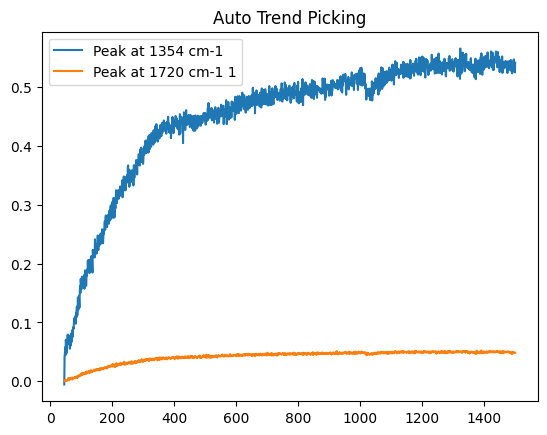

In [154]:
IR_new[IR_new.columns[5:7]][45:1500].plot()
plt.title('Auto Trend Picking')

In [155]:
ir_new = np.array(IR_new[IR_new.columns[5:7]])

In [156]:
ir_new_clean = ir_new[45:]

In [157]:
ir_xs = np.array(range(0,len(ir_new_clean)*30,30))

In [158]:
ir_new_1374 = ir_new_clean[:,0]
ir_new_1720 = ir_new_clean[:,1]

In [159]:
# lets try some streching!!!
ir_end = np.mean(ir_new_1720[int(40000/30)-10:int(40000/30)])
ir_spread = ir_end - 0
cond_end = np.mean(y[3999:4000])
cond_spread = y[0] - cond_end
stretch = cond_spread / ir_spread
ir_new_1720 *= -stretch
ir_new_1720 = ir_new_1720 + y[0] - ir_new_1720[0]

In [160]:
# lets try some streching!!!
ir_end = np.mean(ir_new_1374[int(40000/30)-10:int(40000/30)])
ir_spread = ir_end - 0
cond_end = np.mean(y[3999:4000])
cond_spread = y[0] - cond_end
stretch = cond_spread / ir_spread
ir_new_1374 *= -stretch
ir_new_1374 = ir_new_1374 + y[0] - ir_new_1374[0]

In [161]:
smooth_679 = np.convolve(ki_conc_ir_679[2:], np.ones(5)/5, mode='same')

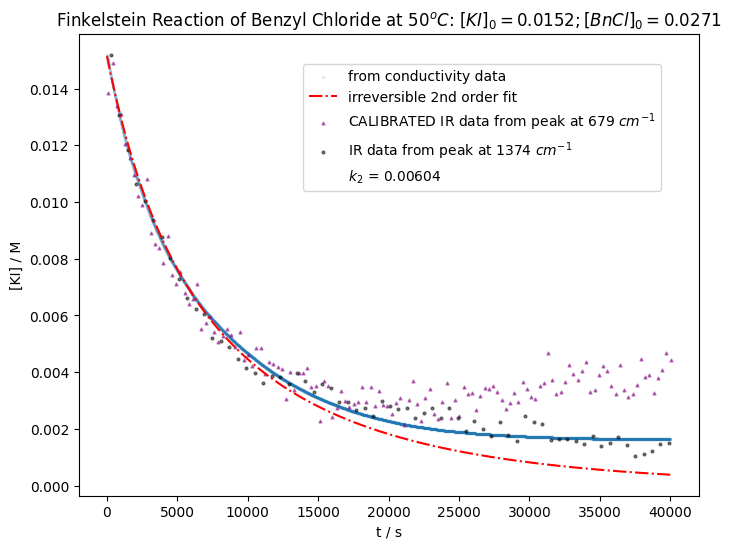

In [162]:
plt.figure(figsize=(8,6))

plt.scatter(x[:4000],y[:4000],s=2,alpha=0.1,marker='o',label='from conductivity data')

plt.plot(x[:4000],c_second(x[:4000],a,b,k2),'r-.',label='irreversible 2nd order fit')

# Uncomment to add IR data
plt.scatter(ir_xs[4:int(40000/30)+2:10],smooth_679[2:int(40000/30):10],s=4,alpha=.5,marker='^',c='purple',label='CALIBRATED IR data from peak at 679 $cm^{-1}$')

#plt.scatter(ir_xs[:int(40000/30):20],ir_new_1720[:int(40000/30):20],s=4,alpha=.5,c='green',label='IR data from peak at 1720 $cm^{-1}$')

plt.scatter(ir_xs[10:int(40000/30):20],ir_new_1374[:int(40000/30):20],s=4,alpha=.5,c='black',label='IR data from peak at 1374 $cm^{-1}$')

plt.plot([],[],alpha=0,label=f'$k_2$ = {k2:.5f}')

plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.title(f'Finkelstein Reaction of Benzyl Chloride at $50^oC$: $[KI]_0 = {b:.4f}; [BnCl]_0 = {a:.4f}$')
plt.legend(loc=1,bbox_to_anchor=(.95,.95))

plt.show()